In [300]:
import DataLoader
import importlib
import pandas as pd
import CoverageHelper
import seaborn as sns

%matplotlib inline
importlib.reload(DataLoader)
coverage_df = DataLoader.load_csv_coverage()
test_graph_df = DataLoader.load_csv_test_graphs()
# stat_graph_df = DataLoader.load_csv_stat_graph(False)
# stat_trans_graph_df = DataLoader.load_csv_stat_graph(True)

Number of apps: 
399


Total covered methods:
4953248


Everything is good!


Total entries:
2002


In [301]:
test_graph_df.head()

,source,target,action,widget_id,widget,strategy,app
0,com.km.ghostcamera.MainActivity,com.km.ghostcamera.cutpaste.util.utils.MainAct...,clickText,2.131427e+09,android.widget.TextView,systematic,com.km.ghostcamera
1,com.km.ghostcamera.GhostCameraActivity,com.google.android.gms.ads.AdActivity,back,NaN,NaN,random,com.km.ghostcamera
2,com.km.ghostcamera.cutpaste.util.utils.MainAct...,com.google.android.gms.ads.AdActivity,clickText,2.131427e+09,android.widget.TextView,random,com.km.ghostcamera
3,com.km.ghostcamera.frames.StickerActivityPath,com.google.android.gms.ads.AdActivity,back,NaN,NaN,random,com.km.ghostcamera
4,com.google.android.gms.ads.AdActivity,com.km.ghostcamera.GhostWallpaperScreen,click,-1.000000e+00,android.widget.ImageView,random,com.km.ghostcamera


In [302]:
test_graph_df.groupby(["strategy", "app"]).count().head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>source</th>
      <th>target</th>
      <th>action</th>
      <th>widget_id</th>
      <th>widget</th>
    </tr>
    <tr>
      <th>strategy</th>
      <th>app</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="5" valign="top">random</th>
      <th>alex.map.maps</th>
      <td>5</td>
      <td>5</td>
      <td>5</td>
      <td>2</td>
      <td>2</td>
    </tr>
    <tr>
      <th>androidlab.carlog</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>appinventor.ai_agiapplications.CountYourSteps</th>
      <td>1</td>
      <td>1</td>
      <td>1</td>
      <td>1</td>
      <td>1</td>
    </tr>
    <tr>
      <th>asp.aniemo.pack6.ext</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>bestfreelivewallpapers.funny_photo_editor</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
</div>

In [303]:
valid_test_graph = test_graph_df[(test_graph_df.source != "com.google.android.gms.ads.AdActivity") &
                                 (test_graph_df.target != "com.google.android.gms.ads.AdActivity")]
valid_test_graph.groupby(["strategy", "app"]).count().head()
# valid_test_graph.drop_duplicates().groupby(["strategy", "app"]).count().head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>source</th>
      <th>target</th>
      <th>action</th>
      <th>widget_id</th>
      <th>widget</th>
    </tr>
    <tr>
      <th>strategy</th>
      <th>app</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="5" valign="top">random</th>
      <th>alex.map.maps</th>
      <td>1</td>
      <td>1</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>androidlab.carlog</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>asp.aniemo.pack6.ext</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>bestfreelivewallpapers.funny_photo_editor</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>bestfreelivewallpapers.love_photo_frames_hd</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
</div>

In [304]:
coverage_df.head()

,package,class,method,strategy,coverage_type,coverage_percentage,covered_lines,total_lines,app
0,com.km.colorpickerview,com.km.colorpickerview.d,<static initializer>,systematic,method,0,0,1,com.km.ghostcamera
1,com.km.colorpickerview,com.km.colorpickerview.d,<static initializer>,systematic,block,0,0,31,com.km.ghostcamera
2,com.km.colorpickerview.a,com.km.colorpickerview.a.a,a (): int,systematic,method,0,0,1,com.km.ghostcamera
3,com.km.colorpickerview.a,com.km.colorpickerview.a.a,a (): int,systematic,block,0,0,4,com.km.ghostcamera
4,com.km.colorpickerview.a,com.km.colorpickerview.a.a,"a (Context, int): void",systematic,method,0,0,1,com.km.ghostcamera


In [305]:
coverage_per_app = coverage_df[(coverage_df.coverage_type == "method")].groupby(["strategy", "app"]).apply(
    lambda x: x.coverage_percentage.sum() / x.coverage_percentage.count())


In [306]:
valid_test_graph[['strategy', 'app']].groupby(['strategy']).nunique()

,strategy,app
strategy,,
random,1,379
systematic,1,394


In [307]:
coverage_per_app.groupby(['strategy']).nunique()

strategy
random        337
systematic    335
dtype: int64

In [309]:
coverage_df[['strategy', 'app']].groupby(['strategy']).nunique()

,strategy,app
strategy,,
random,1,399
systematic,1,399


In [310]:

coverage_with_test_graph = valid_test_graph.groupby(["strategy", "app"]).count().join(coverage_per_app.to_frame(name='coverage')).reset_index()
# coverage_per_app.head()
coverage_with_test_graph.head()

,strategy,app,source,target,action,widget_id,widget,coverage
0,random,alex.map.maps,1,1,1,0,0,51.219512
1,random,androidlab.carlog,1,0,0,0,0,17.230769
2,random,asp.aniemo.pack6.ext,1,0,0,0,0,31.250000
3,random,bestfreelivewallpapers.funny_photo_editor,1,0,0,0,0,6.605148
4,random,bestfreelivewallpapers.love_photo_frames_hd,1,0,0,0,0,6.797583


In [312]:
coverage_with_test_graph[(coverage_with_test_graph.app == "bth.studio.quickcharge")]


,strategy,app,source,target,action,widget_id,widget,coverage
10,random,bth.studio.quickcharge,21,21,21,20,20,38.275862
391,systematic,bth.studio.quickcharge,18,18,18,18,18,36.034483


In [313]:
temp = coverage_per_app.to_frame().reset_index()
temp[(temp.app == "bth.studio.quickcharge")]


,strategy,app,0
12,random,bth.studio.quickcharge,38.275862
411,systematic,bth.studio.quickcharge,36.034483


In [314]:
valid_test_graph[(valid_test_graph.app == "bth.studio.quickcharge")].groupby(["strategy", "app"]).count()

,,source,target,action,widget_id,widget
strategy,app,,,,,
random,bth.studio.quickcharge,21,21,21,20,20
systematic,bth.studio.quickcharge,18,18,18,18,18


In [315]:
random_coverage_with_test_graph = coverage_with_test_graph[(coverage_with_test_graph.strategy == "random")].drop('strategy', 1).set_index('app')
systematic_coverage_with_test_graph = coverage_with_test_graph[(coverage_with_test_graph.strategy == "systematic")].drop('strategy', 1).set_index('app')

diff_in_coverage_per_app = random_coverage_with_test_graph['coverage'] - systematic_coverage_with_test_graph['coverage']
diff_in_coverage_per_app.to_frame().head()



,coverage
app,
alex.map.maps,29.268293
androidlab.carlog,-1.846154
appinventor.ai_agiapplications.CountYourSteps,NaN
asp.aniemo.pack6.ext,0.000000
bestfreelivewallpapers.funny_photo_editor,2.185527


In [316]:
diff_in_graph_per_app = random_coverage_with_test_graph['source'] - systematic_coverage_with_test_graph['source']
diff_in_graph_per_app.to_frame().head()

,source
app,
alex.map.maps,0.0
androidlab.carlog,0.0
appinventor.ai_agiapplications.CountYourSteps,NaN
asp.aniemo.pack6.ext,0.0
bestfreelivewallpapers.funny_photo_editor,0.0


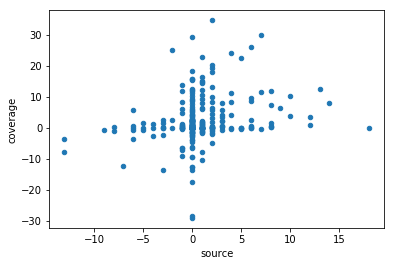

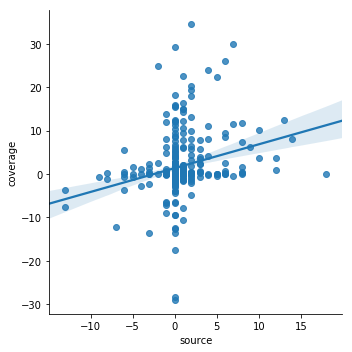

In [317]:
diff_result = pd.concat([diff_in_graph_per_app.to_frame(), diff_in_coverage_per_app.to_frame()], axis=1, sort=False)
diff_result.plot.scatter(x='source', y='coverage')
sns.lmplot(x='source', y='coverage', data=diff_result,fit_reg=True) 


In [318]:
random_coverage_with_test_graph.head()

,source,target,action,widget_id,widget,coverage
app,,,,,,
alex.map.maps,1,1,1,0,0,51.219512
androidlab.carlog,1,0,0,0,0,17.230769
asp.aniemo.pack6.ext,1,0,0,0,0,31.250000
bestfreelivewallpapers.funny_photo_editor,1,0,0,0,0,6.605148
bestfreelivewallpapers.love_photo_frames_hd,1,0,0,0,0,6.797583


In [319]:
systematic_coverage_with_test_graph.head()

,source,target,action,widget_id,widget,coverage
app,,,,,,
alex.map.maps,1,1,1,1,1,21.951220
androidlab.carlog,1,0,0,0,0,19.076923
appinventor.ai_agiapplications.CountYourSteps,1,0,0,0,0,0.000000
asp.aniemo.pack6.ext,1,0,0,0,0,31.250000
bestfreelivewallpapers.funny_photo_editor,1,0,0,0,0,4.419621
